# Algorithms and Applications in Social Networks
## Homework 2
### Ido Lerer 206120545, Offek Gil 308315092

## Question 1

### Question 1a

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter 

In [55]:
def newman_girvan(G, k):
    Gc = G.copy()
    while (nx.number_connected_components(Gc) < k):
        edge_betweeness = nx.edge_betweenness_centrality(Gc)
        e = max(edge_betweeness.items(), key=itemgetter(1))[0]
        Gc.remove_edge(e[0], e[1])
    return list(nx.connected_components(Gc))

### Question 1b

In [66]:
G = nx.read_edgelist("communities.txt")

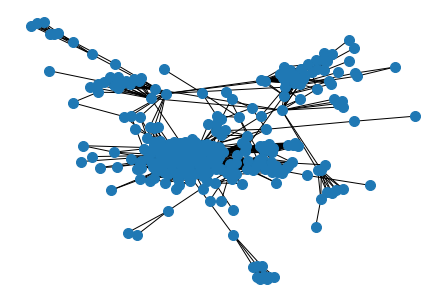

In [67]:
largest_connected_component = G.subgraph(max(nx.connected_components(G), key=len))
pos = nx.spring_layout(largest_connected_component)
nx.draw(largest_connected_component, pos, node_size=100)
plt.show()

In [69]:
Gc = newman_girvan(largest_connected_component, 3)

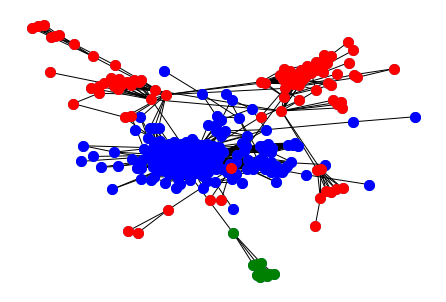

In [70]:
nx.draw(largest_connected_component, pos, node_size=100)
nx.draw_networkx_nodes(largest_connected_component, pos, nodelist=Gc[0], node_color='b', node_size=100)
nx.draw_networkx_nodes(largest_connected_component, pos, nodelist=Gc[1], node_color='r', node_size=100)
nx.draw_networkx_nodes(largest_connected_component, pos, nodelist=Gc[2], node_color='g', node_size=100)
plt.show()

In [71]:
print(Gc)

[{'39', '295', '249', '261', '294', '257', '248', '51', '232', '55', '69', '320', '308', '119', '197', '82', '323', '286', '21', '125', '50', '311', '338', '322', '266', '73', '66', '104', '268', '96', '170', '81', '171', '45', '301', '173', '130', '341', '158', '122', '336', '190', '126', '129', '38', '246', '36', '277', '247', '284', '185', '285', '331', '334', '59', '72', '223', '109', '211', '76', '98', '258', '108', '128', '183', '120', '77', '186', '200', '40', '107', '27', '221', '153', '208', '265', '165', '160', '291', '345', '159', '280', '24', '47', '9', '166', '127', '58', '92', '198', '135', '148', '217', '13', '25', '254', '242', '10', '269', '252', '235', '26', '340', '164', '187', '100', '88', '309', '332', '276', '54', '316', '304', '194', '238', '142', '324', '134', '163', '203', '222', '94', '300', '75', '274', '342', '48', '136', '121', '189', '317', '87', '156', '196', '105', '204', '283', '34', '236', '298', '188', '346', '314', '133', '347', '191', '84', '303', '

### Question 1c

1. Calculating betweens:
    BFS Weights:
        A -> {(A,B):4, (B,D):2, (B,C):1, (D,E):1}
        B -> {(A,B):1, (B,D):2, (B,C):1, (D,E):1}
        C -> {(C,B):2, (C,D):1, (C,E):1, (B,A):1}
        D -> {(D,B):2, (D,C):1, (D,E):1, (B,A):1}
        E -> {(E,C):3, (E,D):1, (C,B):2, (B,A):1}
    Edge betweeness: (sum/2)
        {(A,B):4, (B,C):3, (B,D):3, (C,D):1, (C,E):2, (D,E):2}
2. Removing edge with largest EB:
    (A,B)
We are left with the two communities {A}, {B, C, D, E} and we are done.

Dendogram:
![alt text](DEND.png "Dendogram")

# Question 2

Proof: Let G be the complete graph with 20 vertices which 18 of its edges were removed, we'll show it is still connected. Assume by contradiction that the graph isn't connected. Given one of the graph's connected components, marked C and having k verticies, there are 20-k>0 verticies not in C (k=20 contradicts the assumption). Since in the original graph all verticies in C had edges to all verticies outside of it, at least k*(20-k) edges had to be removed. We get:
    $$
    k * (20 - k) \leq 18\\
    0 \leq k^2 - 20k + 18\\
    k \geq 19.05\lor k \leq 0.944
    $$
Which are both not possible. Contradiction.

# Question 3

Proof: Let G be the complete graph with n vertices, some of its edges marked as 'phone' and some as 'mail'. We'll show either the graph is connected using only the 'phone' edges or connected using only the 'mail' edges. If the graph is connected using the 'phone' we are done. Assuming it isn't, we'll show it is connected using the 'mail' edges:    
Let u,v be verticies in the graph. If (u,v) is a 'mail' edge we are done. Else, they are connected in the 'phone' graph, and there exists a vertex w that isn't a neighbour of either of them in the 'phone' graph (otherwise the entire graph is in the same connected component, contradicting the assumption that the 'phone' graph is not connected). Therefore (u,w),(v,w) are edges in the 'mail' graph and u,v are connected though w. We've shown the 'mail' graph is connected and the proof is complete.

# Question 4

### Question 4a

In [28]:
def find_communities(threshold_matrix, clique_list):
    #gets threshold_matrix and clique_list, goes over the matrix to find all connected communities
    used_cliques = set()
    length = len(threshold_matrix)
    communities = []
    
    for i in range(length):
        if i in used_cliques:
            continue
        clique_queue = {i}
        community = set()
        community = community.union(clique_list[i])
        
        while len(clique_queue) > 0:
            curr_clique = clique_queue.pop()
            if curr_clique not in used_cliques:
                for j in range(length):
                    if threshold_matrix[curr_clique][j] == 1:
                        clique_queue.add(j)
                        community = community.union(clique_list[j])
                used_cliques.add(curr_clique)
                    
        communities.append(community)
    return communities
            

def k_clique_communities(G, k):
    max_cliques = nx.find_cliques(G)
    threshold_matrix = []
    clique_list = []
   
    #find al cliques that are at least size k
    for clique in max_cliques:
        if len(clique) >= k:
            clique_list.append(set(clique))
    
    #preset the thershold matrix with all zeros
    for i in range(len(clique_list)):
         threshold_matrix.append([0 for i in range(len(clique_list))])
    
    #
    for i in range(len(clique_list)):
        #c_set1 = set(clique_list[i])
        for j in range(i,len(clique_list)):
            overlap =  len(clique_list[i] & clique_list[j]) 
            #overlap =  len(c_set1 & set(clique_list[j])) 
            if overlap >= (k-1):
                #if two cliques have at least k-1 overlap, mark them as connceting
                threshold_matrix[i][j] = 1
                if(i != j):
                    threshold_matrix[j][i] = 1
                
    communities = find_communities(threshold_matrix, clique_list)
    return(communities)
    
    
    

### Question 4b

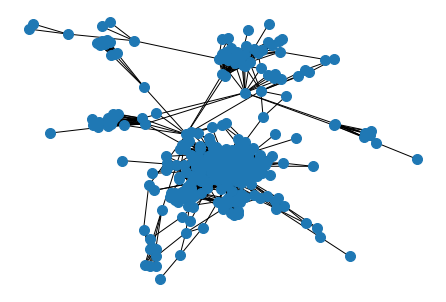

There are 9 4-clique comunities in the largest connected component:

[{'181', '4', '306', '275', '152', '273', '328', '218', '195', '78'}, {'177', '225', '263', '99', '131', '296', '86', '278', '23', '102', '227', '46', '175', '68', '143'}, {'73', '231', '200', '139', '29', '274', '284', '232', '85', '309', '129', '132', '252', '80', '261', '75', '67', '298', '92', '197', '277', '303', '178', '339', '57', '242', '10', '45', '158', '322', '31', '300', '314', '163', '238', '302', '323', '169', '106', '176', '103', '254', '229', '146', '342', '77', '172', '344', '320', '271', '251', '104', '36', '313', '60', '194', '280', '66', '338', '213', '50', '121', '123', '3', '39', '88', '100', '285', '189', '96', '281', '40', '224', '212', '187', '53', '341', '5', '26', '126', '249', '185', '119', '130', '133', '208', '308', '38', '184', '315', '221', '1', '222', '122', '128', '171', '165', '325', '304', '236', '239', '156', '334', '24', '299', '170', '136', '246', '168', '87', '135', '48', '79', 

In [30]:
G = nx.read_edgelist("communities.txt")
largest_connected_component = G.subgraph(max(nx.connected_components(G), key=len))
pos = nx.spring_layout(largest_connected_component)
nx.draw(largest_connected_component, pos, node_size=100)
plt.show()
communs = k_clique_communities(largest_connected_component, 4)
print("There are", len(communs),"4-clique comunities in the largest connected component:\n")
print(communs)

### Question 4c

![alt text](AASN_hw2_cliques.jpg "Communities")

Using the algorithm manualy, we get that there are 4 3-clique communities in the given graph:  
1 - {E,F,I}  
2 - {B,C,F,G}  
3 - {C,D,H}  
4 - {G,J,K,L}

### Question 4d

The graphs central node is G.  
This is because the maximum distance between it and any other node in the graph, is 2, and this is less then all other nodes.